In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
file_path = "....StudentsPerformance.csv"
df = pd.read_csv(file_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [5]:
 df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [6]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
 df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [8]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
df.describe().T.style.background_gradient(cmap='Greens')

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


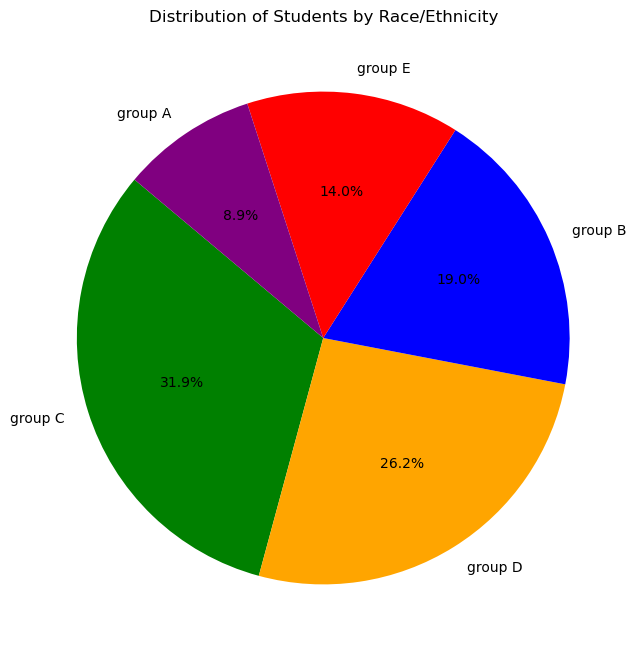

In [13]:
data = df['race/ethnicity'].value_counts()
colors = ['green', 'orange', 'blue', 'red', 'purple']

plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Students by Race/Ethnicity')
plt.show()

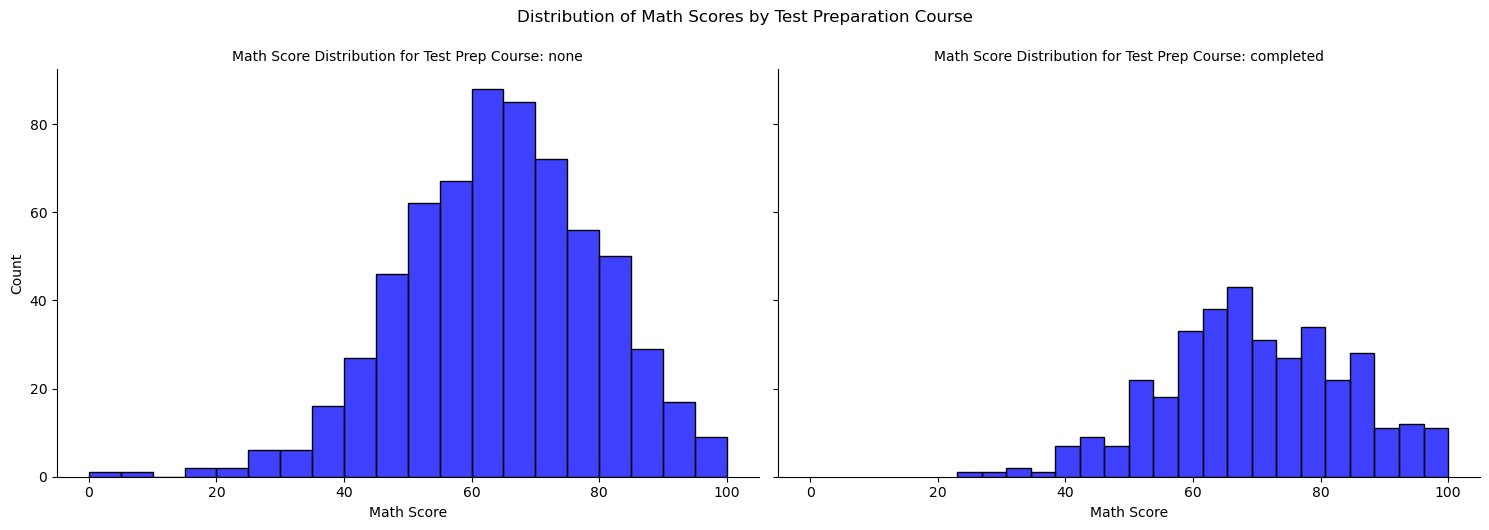

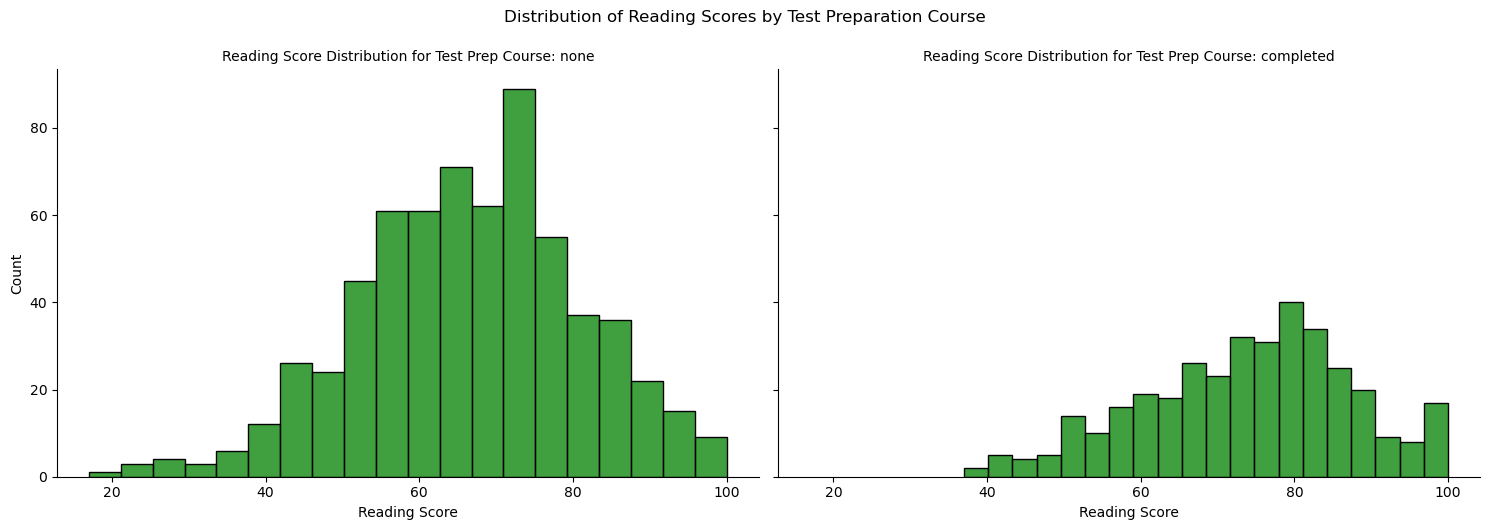

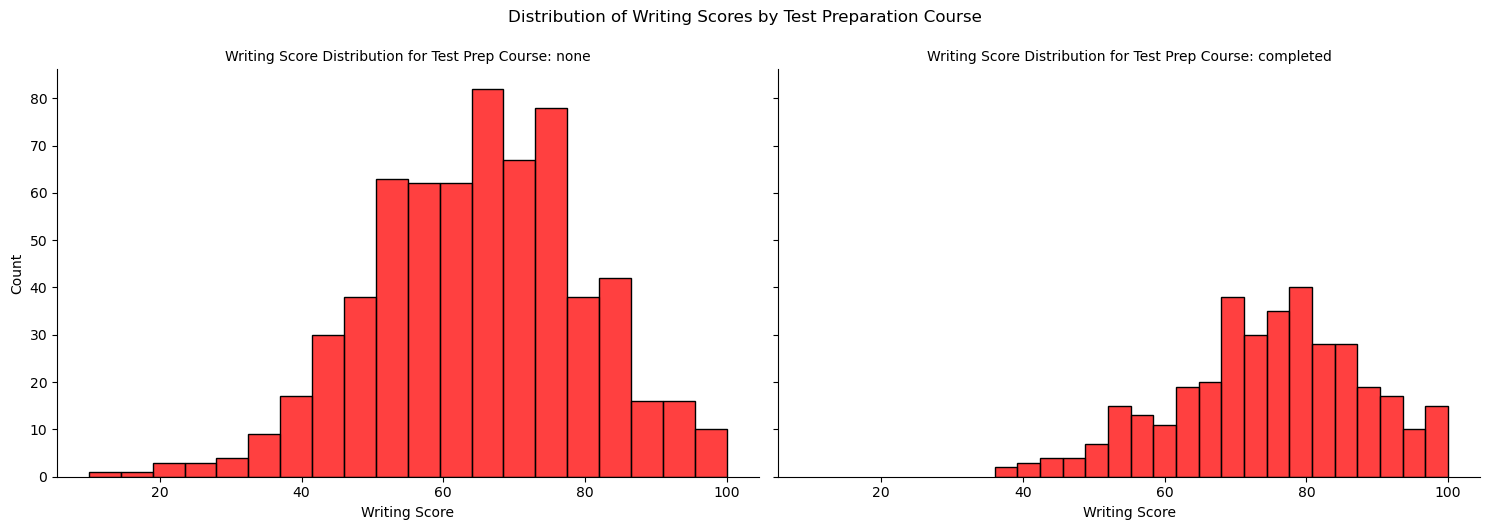

In [14]:
# Create a FacetGrid for plotting
g = sns.FacetGrid(df, col='test preparation course', height=5, aspect=1.5, palette='viridis')

# Map different plots to the grid
g.map(sns.histplot, 'math score', bins=20, kde=False, color='blue')
g.set_axis_labels('Math Score', 'Count')
g.set_titles('Math Score Distribution for Test Prep Course: {col_name}')


g.fig.suptitle('Distribution of Math Scores by Test Preparation Course', y=1.05)
plt.show()


g = sns.FacetGrid(df, col='test preparation course', height=5, aspect=1.5, palette='viridis')
g.map(sns.histplot, 'reading score', bins=20, kde=False, color='green')
g.set_axis_labels('Reading Score', 'Count')
g.set_titles('Reading Score Distribution for Test Prep Course: {col_name}')


g.fig.suptitle('Distribution of Reading Scores by Test Preparation Course', y=1.05)
plt.show()


g = sns.FacetGrid(df, col='test preparation course', height=5, aspect=1.5, palette='viridis')
g.map(sns.histplot, 'writing score', bins=20, kde=False, color='red')
g.set_axis_labels('Writing Score', 'Count')
g.set_titles('Writing Score Distribution for Test Prep Course: {col_name}')


g.fig.suptitle('Distribution of Writing Scores by Test Preparation Course', y=1.05)
plt.show()

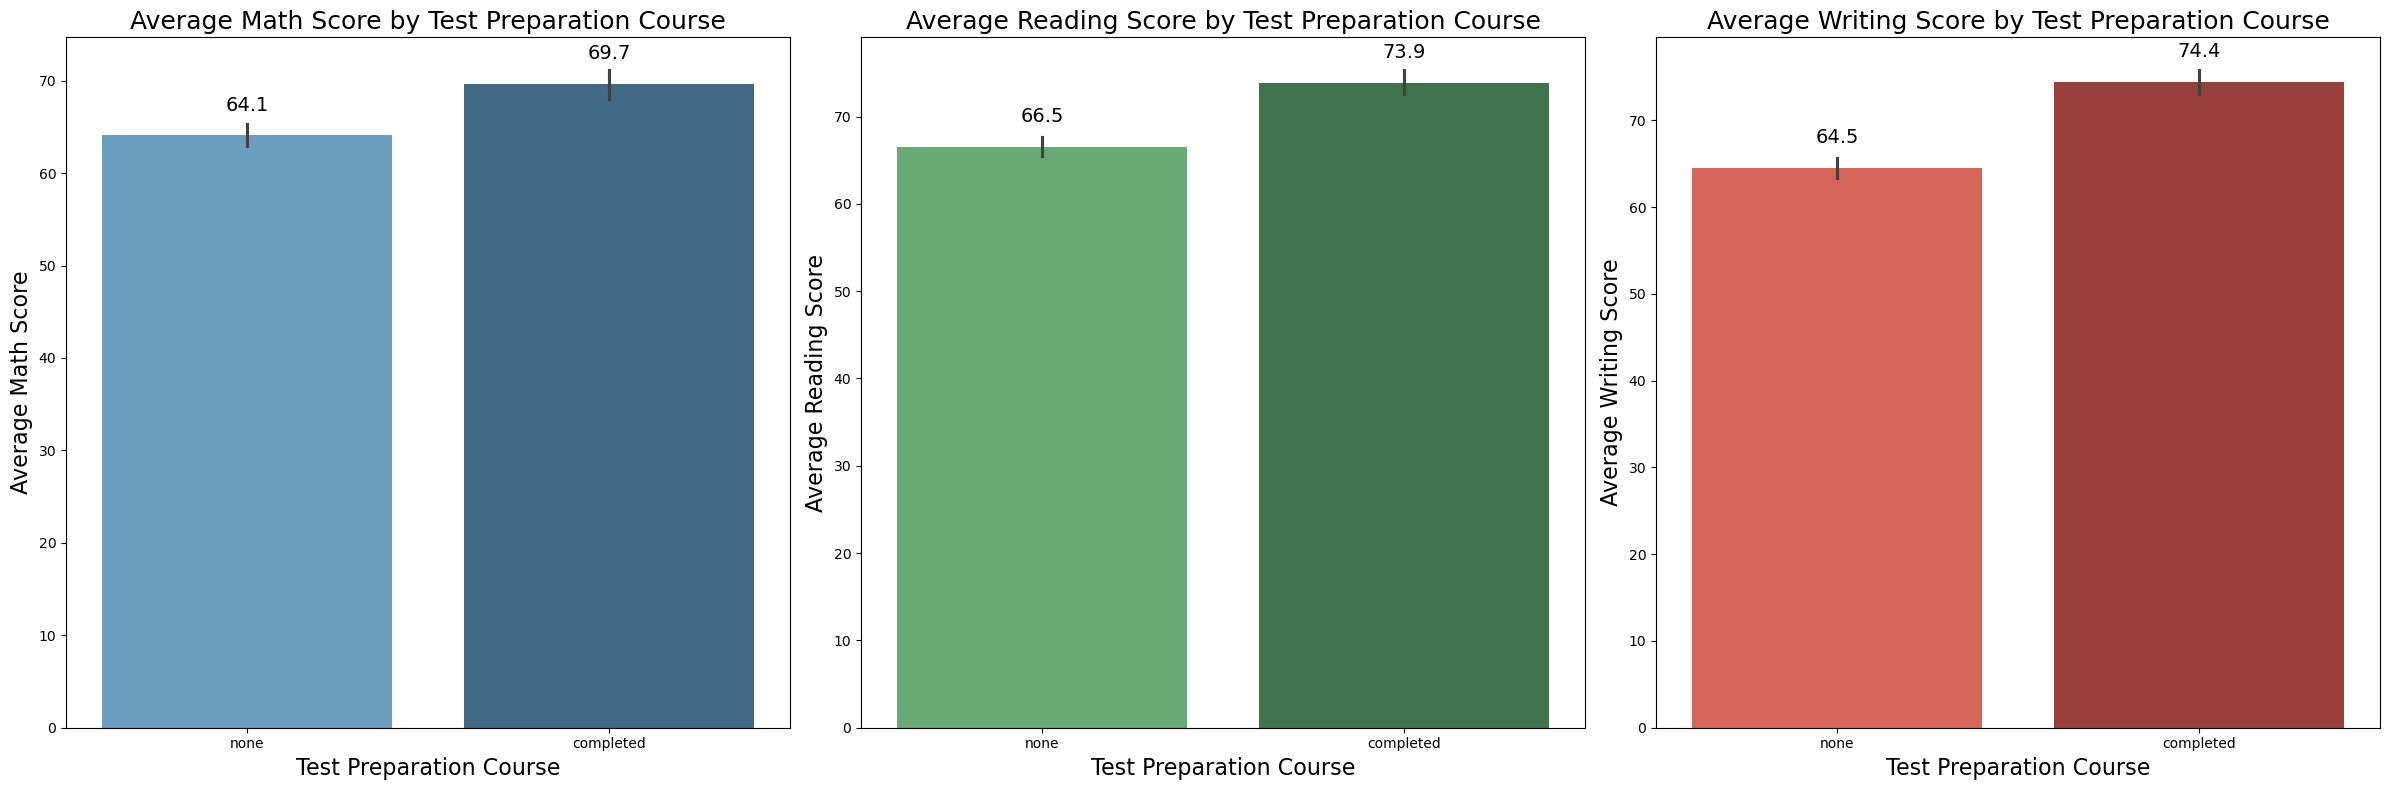

In [15]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course', y='math score', data=df, palette='Blues_d')
plt.title('Average Math Score by Test Preparation Course', fontsize=18)
plt.xlabel('Test Preparation Course', fontsize=16)
plt.ylabel('Average Math Score', fontsize=16)
# Add value labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', color='black', fontsize=14)

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course', y='reading score', data=df, palette='Greens_d')
plt.title('Average Reading Score by Test Preparation Course', fontsize=18)
plt.xlabel('Test Preparation Course', fontsize=16)
plt.ylabel('Average Reading Score', fontsize=16)


for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', color='black', fontsize=14)

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course', y='writing score', data=df, palette='Reds_d')
plt.title('Average Writing Score by Test Preparation Course', fontsize=18)
plt.xlabel('Test Preparation Course', fontsize=16)
plt.ylabel('Average Writing Score', fontsize=16)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', xytext=(0, 15), textcoords='offset points', color='black', fontsize=14)

plt.tight_layout()
plt.show()

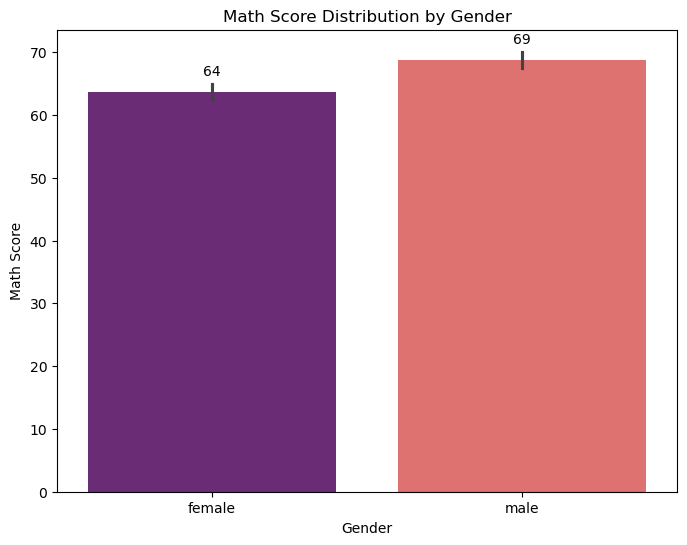

In [16]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='math score', data=df, palette='magma')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.title('Math Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

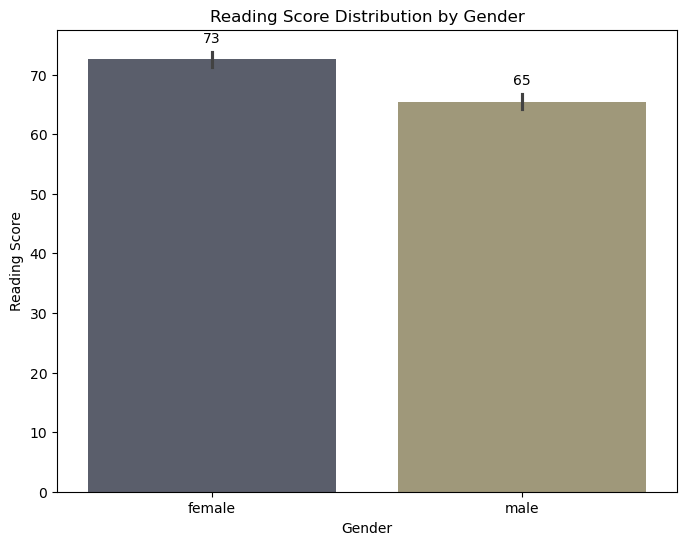

In [17]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='reading score', data=df, palette='cividis')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.title('Reading Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()

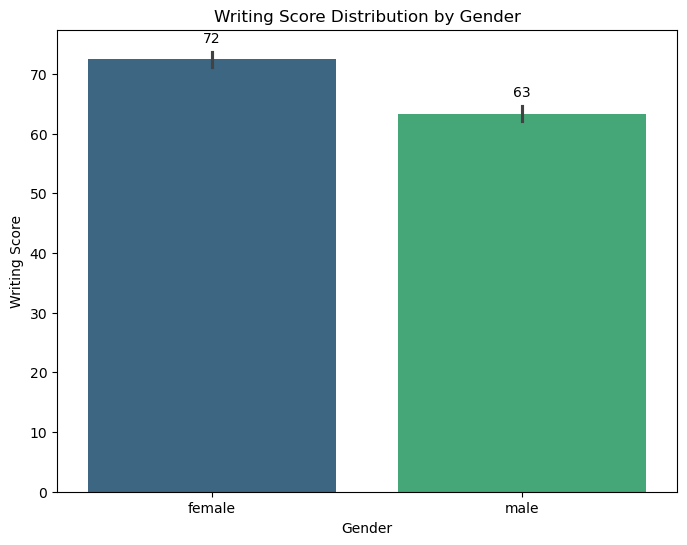

In [18]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='writing score', data=df, palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.title('Writing Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.show()

In [19]:
grouped_df = df.groupby('race/ethnicity').agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()


In [20]:
print(grouped_df)

  race/ethnicity  math score  reading score  writing score
0        group A   61.629213      64.674157      62.674157
1        group B   63.452632      67.352632      65.600000
2        group C   64.463950      69.103448      67.827586
3        group D   67.362595      70.030534      70.145038
4        group E   73.821429      73.028571      71.407143


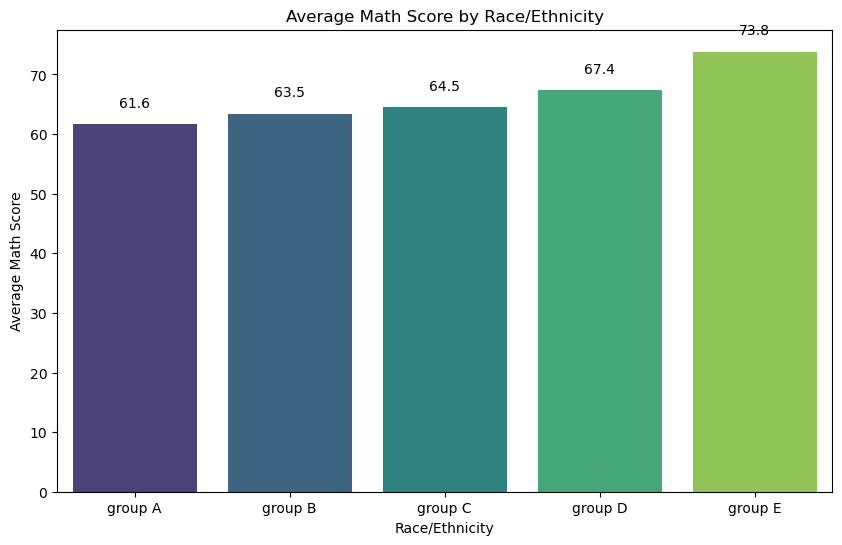

In [21]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='race/ethnicity', y='math score', data=grouped_df, palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                color='black')

plt.title('Average Math Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Math Score')
plt.show()

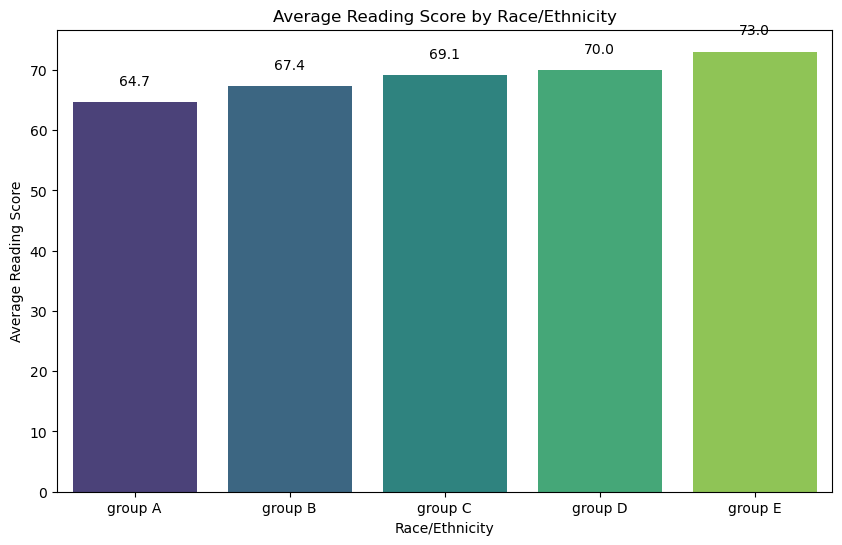

In [22]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='race/ethnicity', y='reading score', data=grouped_df, palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                color='black')

plt.title('Average Reading Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Reading Score')
plt.show()

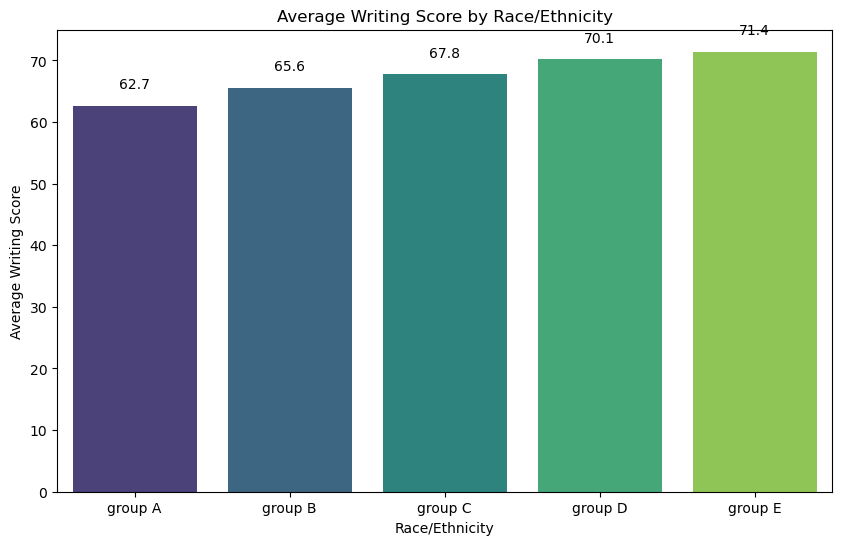

In [23]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='race/ethnicity', y='writing score', data=grouped_df, palette='viridis')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',
                color='black')

plt.title('Average Writing Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Writing Score')
plt.show()

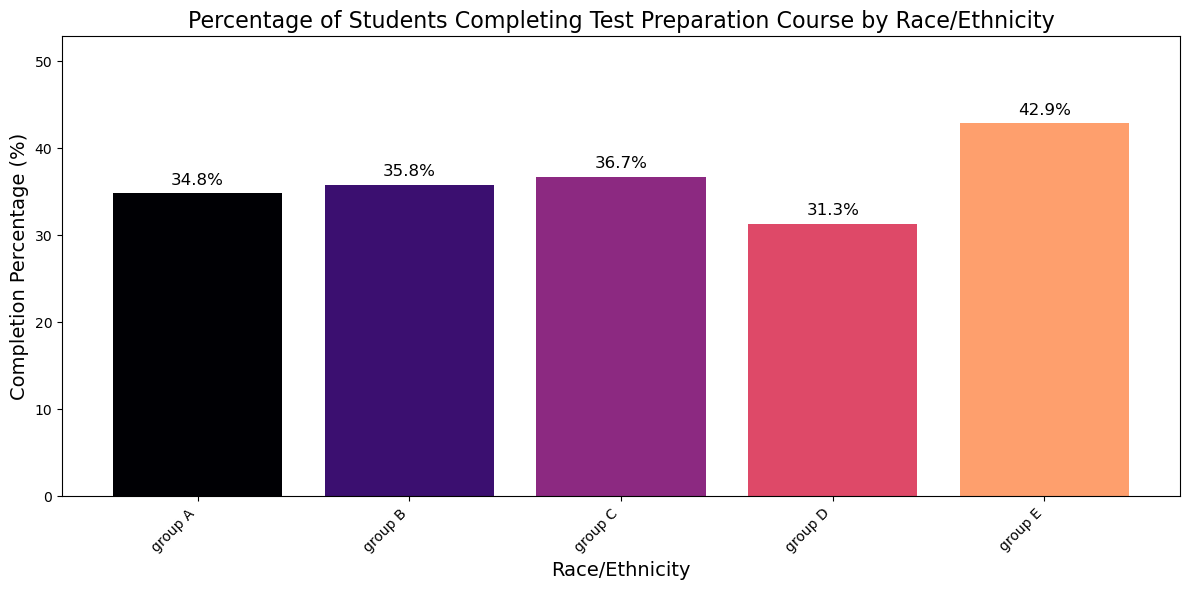

In [24]:
# Compute percentage of students who completed the test preparation course by race/ethnicity
test_prep_percentage = df.groupby('race/ethnicity')['test preparation course'].apply(lambda x: (x == 'completed').mean() * 100).reset_index()
test_prep_percentage.columns = ['race/ethnicity', 'Completion Percentage']


plt.figure(figsize=(12, 6))
cmap = plt.get_cmap('magma') 
colors = [cmap(i / len(test_prep_percentage)) for i in range(len(test_prep_percentage))] 

plt.bar(test_prep_percentage['race/ethnicity'], test_prep_percentage['Completion Percentage'], color=colors)
plt.title('Percentage of Students Completing Test Preparation Course by Race/Ethnicity', fontsize=16)
plt.xlabel('Race/Ethnicity', fontsize=14)
plt.ylabel('Completion Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')  


for i, value in enumerate(test_prep_percentage['Completion Percentage']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)


plt.ylim(0, max(test_prep_percentage['Completion Percentage']) + 10)  

plt.tight_layout()
plt.show()

In [25]:
#using plotly.expres 
import plotly.express as px


test_prep_percentage = df.groupby('race/ethnicity')['test preparation course'].apply(lambda x: (x == 'completed').mean() * 100).reset_index()
test_prep_percentage.columns = ['race/ethnicity', 'Completion Percentage']


fig = px.bar(test_prep_percentage, x='race/ethnicity', y='Completion Percentage',
             title='Percentage of Students Completing Test Preparation Course by Race/Ethnicity',
             labels={'race/ethnicity': 'Race/Ethnicity', 'Completion Percentage': 'Completion Percentage (%)'},
             color='Completion Percentage',
             color_continuous_scale='reds')

fig.update_layout(xaxis_title='Race/Ethnicity', yaxis_title='Completion Percentage (%)')
fig.show()


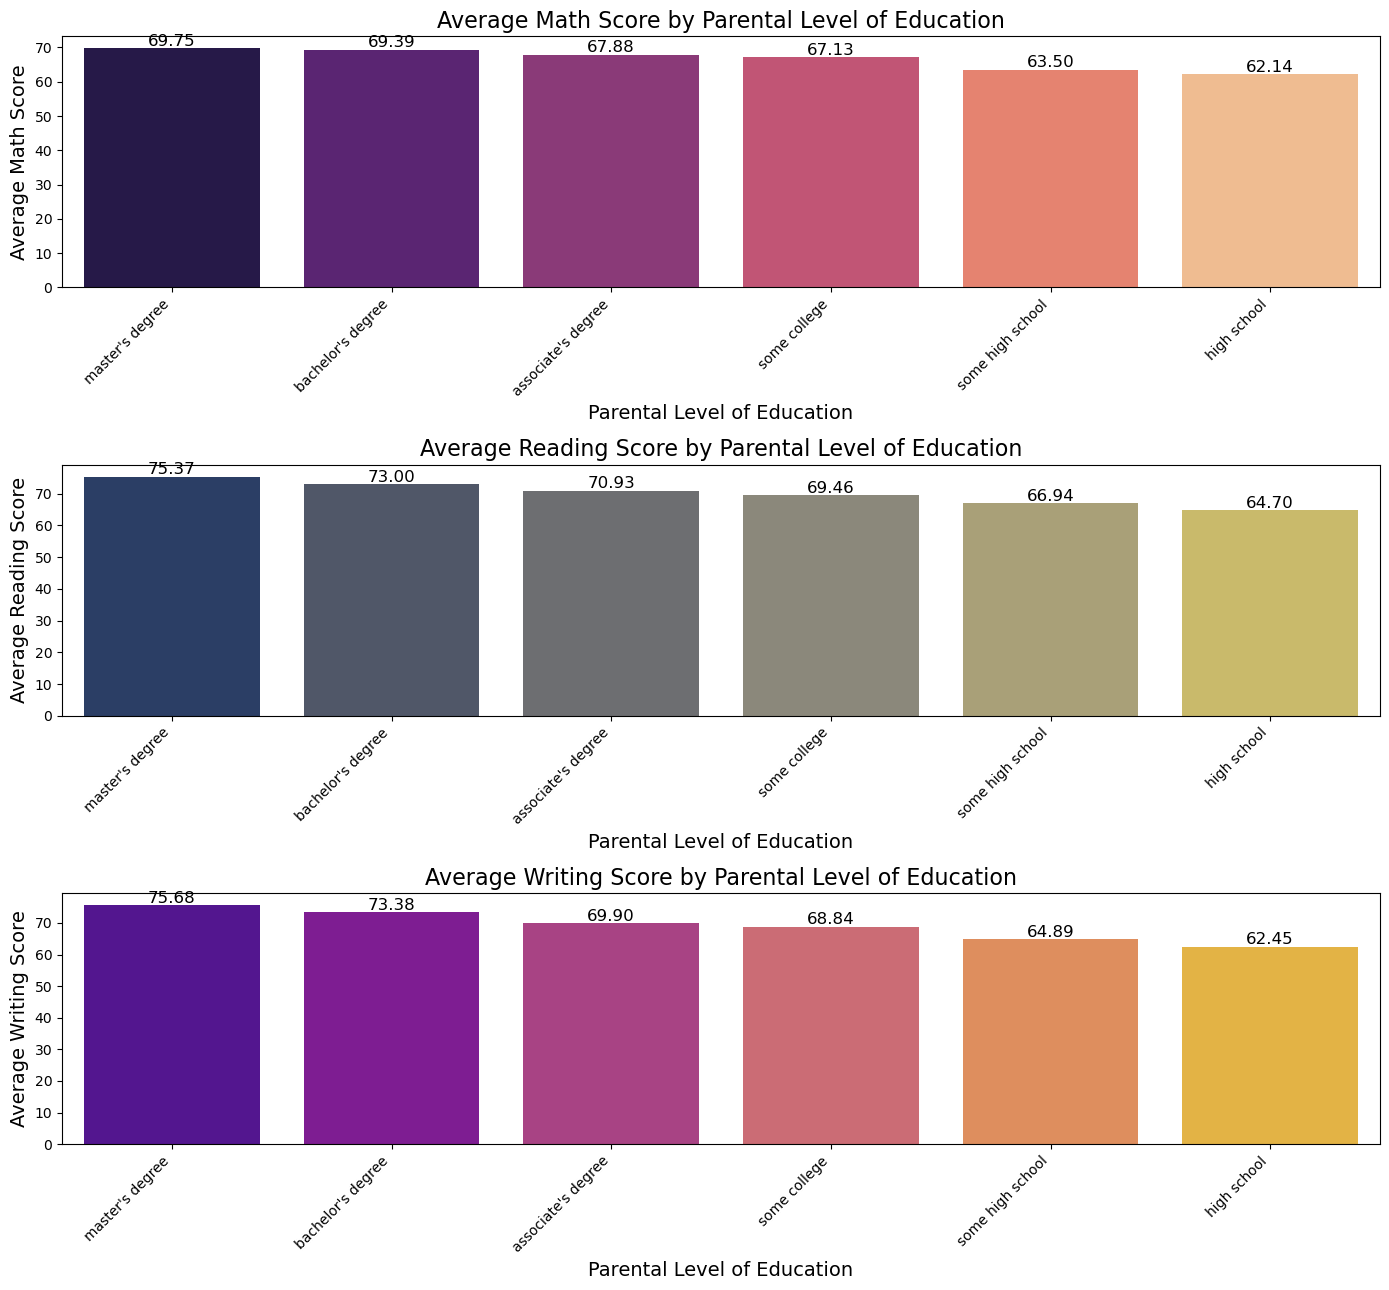

In [26]:
# Compute the average scores by parental level of education
education_avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()

# Sort the dataframe by each score in descending order and create ordered categories
education_avg_scores_sorted_math = education_avg_scores.sort_values(by='math score', ascending=False)
education_avg_scores_sorted_reading = education_avg_scores.sort_values(by='reading score', ascending=False)
education_avg_scores_sorted_writing = education_avg_scores.sort_values(by='writing score', ascending=False)

# Create ordered categories for plotting
ordered_categories_math = education_avg_scores_sorted_math['parental level of education'].tolist()
ordered_categories_reading = education_avg_scores_sorted_reading['parental level of education'].tolist()
ordered_categories_writing = education_avg_scores_sorted_writing['parental level of education'].tolist()

plt.figure(figsize=(14, 13))

plt.subplot(3, 1, 1)
ax1 = sns.barplot(x='parental level of education', y='math score', data=education_avg_scores_sorted_math, 
                  palette='magma', order=ordered_categories_math)
plt.title('Average Math Score by Parental Level of Education', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=14)
plt.ylabel('Average Math Score', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(3, 1, 2)
ax2 = sns.barplot(x='parental level of education', y='reading score', data=education_avg_scores_sorted_reading, 
                  palette='cividis', order=ordered_categories_reading)
plt.title('Average Reading Score by Parental Level of Education', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=14)
plt.ylabel('Average Reading Score', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(3, 1, 3)
ax3 = sns.barplot(x='parental level of education', y='writing score', data=education_avg_scores_sorted_writing, 
                  palette='plasma', order=ordered_categories_writing)
plt.title('Average Writing Score by Parental Level of Education', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=14)
plt.ylabel('Average Writing Score', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [27]:
education_avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()

education_avg_scores_melted = education_avg_scores.melt(id_vars='parental level of education', 
                                                         value_vars=['math score', 'reading score', 'writing score'],
                                                         var_name='subject',
                                                         value_name='average_score')

def create_sorted_plot(df, subject, title):
    filtered_df = df[df['subject'] == subject].sort_values(by='average_score', ascending=False)
    
    fig = px.bar(filtered_df,
                 x='parental level of education',
                 y='average_score',
                 color='average_score',
                 color_continuous_scale='YlGnBu',  
                 title=title)
    
    fig.update_layout(xaxis_title='Parental Level of Education',
                      yaxis_title=f'Average {subject.split()[0].title()} Score',
                      xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
    
    return fig

fig_math = create_sorted_plot(education_avg_scores_melted, 'math score', 'Average Math Score by Parental Level of Education')
fig_reading = create_sorted_plot(education_avg_scores_melted, 'reading score', 'Average Reading Score by Parental Level of Education')
fig_writing = create_sorted_plot(education_avg_scores_melted, 'writing score', 'Average Writing Score by Parental Level of Education')

# Show plots
fig_math.show()
fig_reading.show()
fig_writing.show()

In [28]:
# List of unique races/ethnicities, sorted
races = sorted(df['race/ethnicity'].unique())


for race in races:
    race_df = df[df['race/ethnicity'] == race]
    education_distribution = race_df['parental level of education'].value_counts().reset_index()
    education_distribution.columns = ['parental level of education', 'count']
     
    fig = px.pie(education_distribution, 
                 names='parental level of education', 
                 values='count',
                 title=f'Distribution of Parental Level of Education for {race}',
                 color='parental level of education',
                 color_discrete_sequence=px.colors.sequential.Plasma)  # Use Plasma color sequence
    
    
    fig.update_layout(title_text=f'Distribution of Parental Level of Education for {race}')
    fig.show()

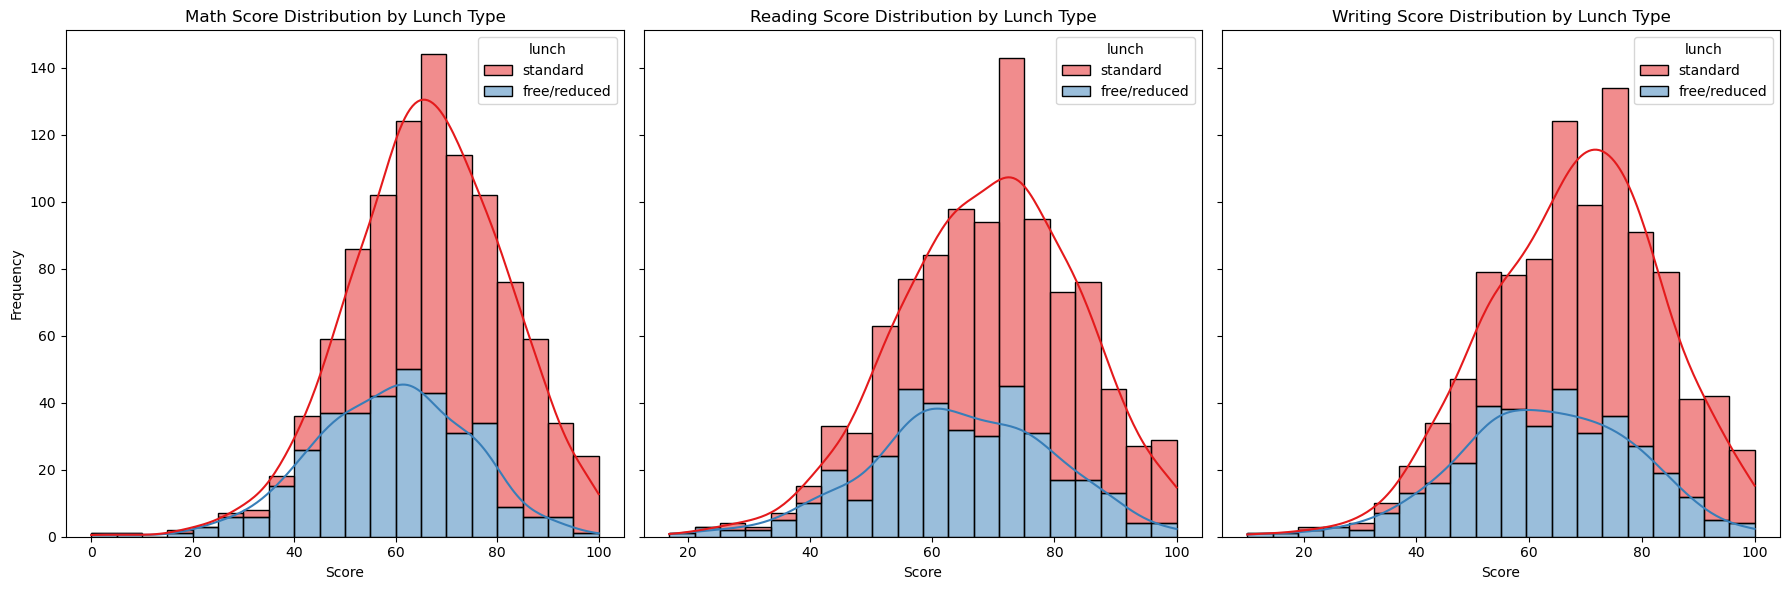

In [29]:

palette = 'Set1'  


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define subjects and corresponding titles
subjects = ['math score', 'reading score', 'writing score']
titles = ['Math Score Distribution by Lunch Type', 'Reading Score Distribution by Lunch Type', 'Writing Score Distribution by Lunch Type']

for i, (subject, title) in enumerate(zip(subjects, titles)):
    ax = axes[i]
    sns.histplot(data=df, x=subject, hue='lunch', multiple='stack', palette=palette, ax=ax, bins=20, kde=True)
    ax.set_title(title)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

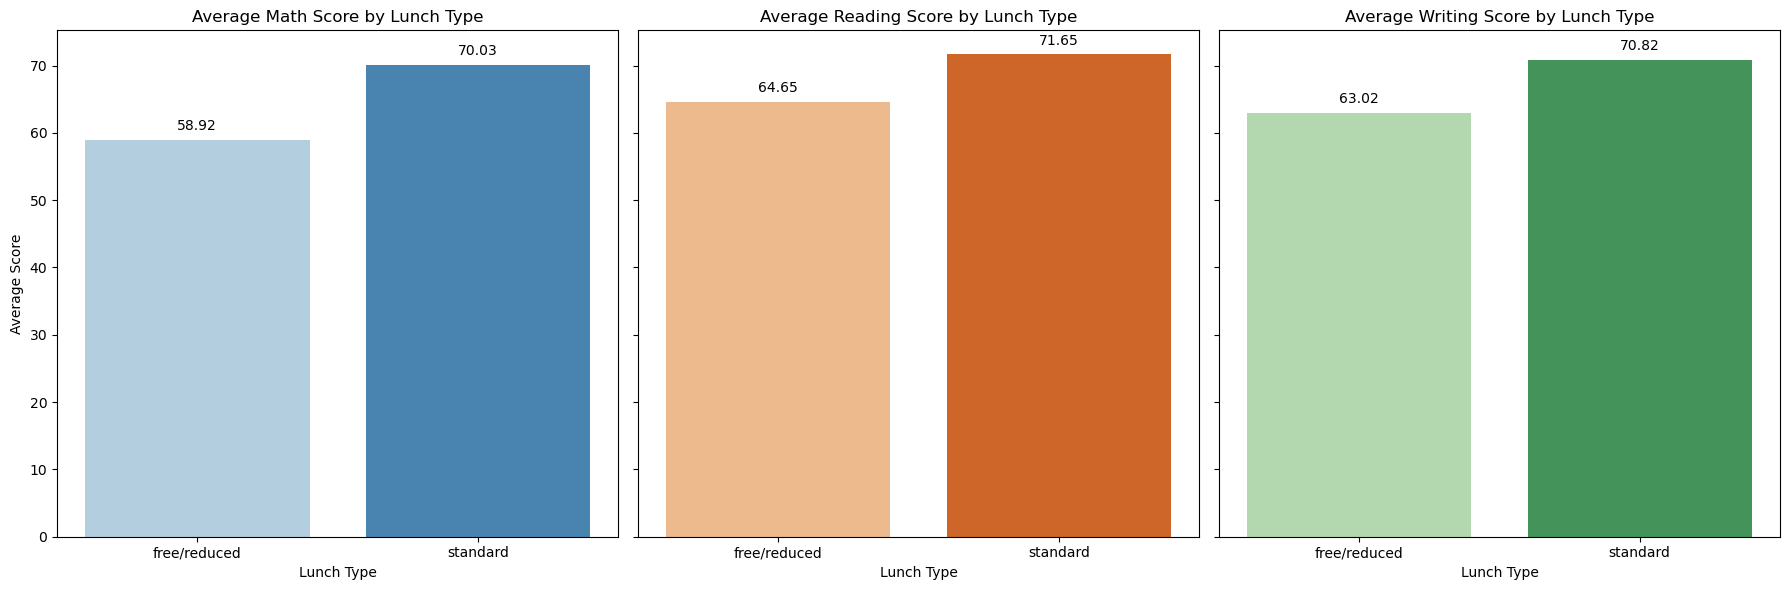

In [30]:

colors = ['Blues', 'Oranges', 'Greens']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
subjects = ['math score', 'reading score', 'writing score']
titles = ['Average Math Score by Lunch Type', 'Average Reading Score by Lunch Type', 'Average Writing Score by Lunch Type']

for i, (subject, title) in enumerate(zip(subjects, titles)):
    ax = axes[i]
    avg_scores = df.groupby('lunch')[subject].mean().reset_index()
    sns.barplot(x='lunch', y=subject, data=avg_scores, palette=colors[i], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lunch Type')
    ax.set_ylabel('Average Score')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

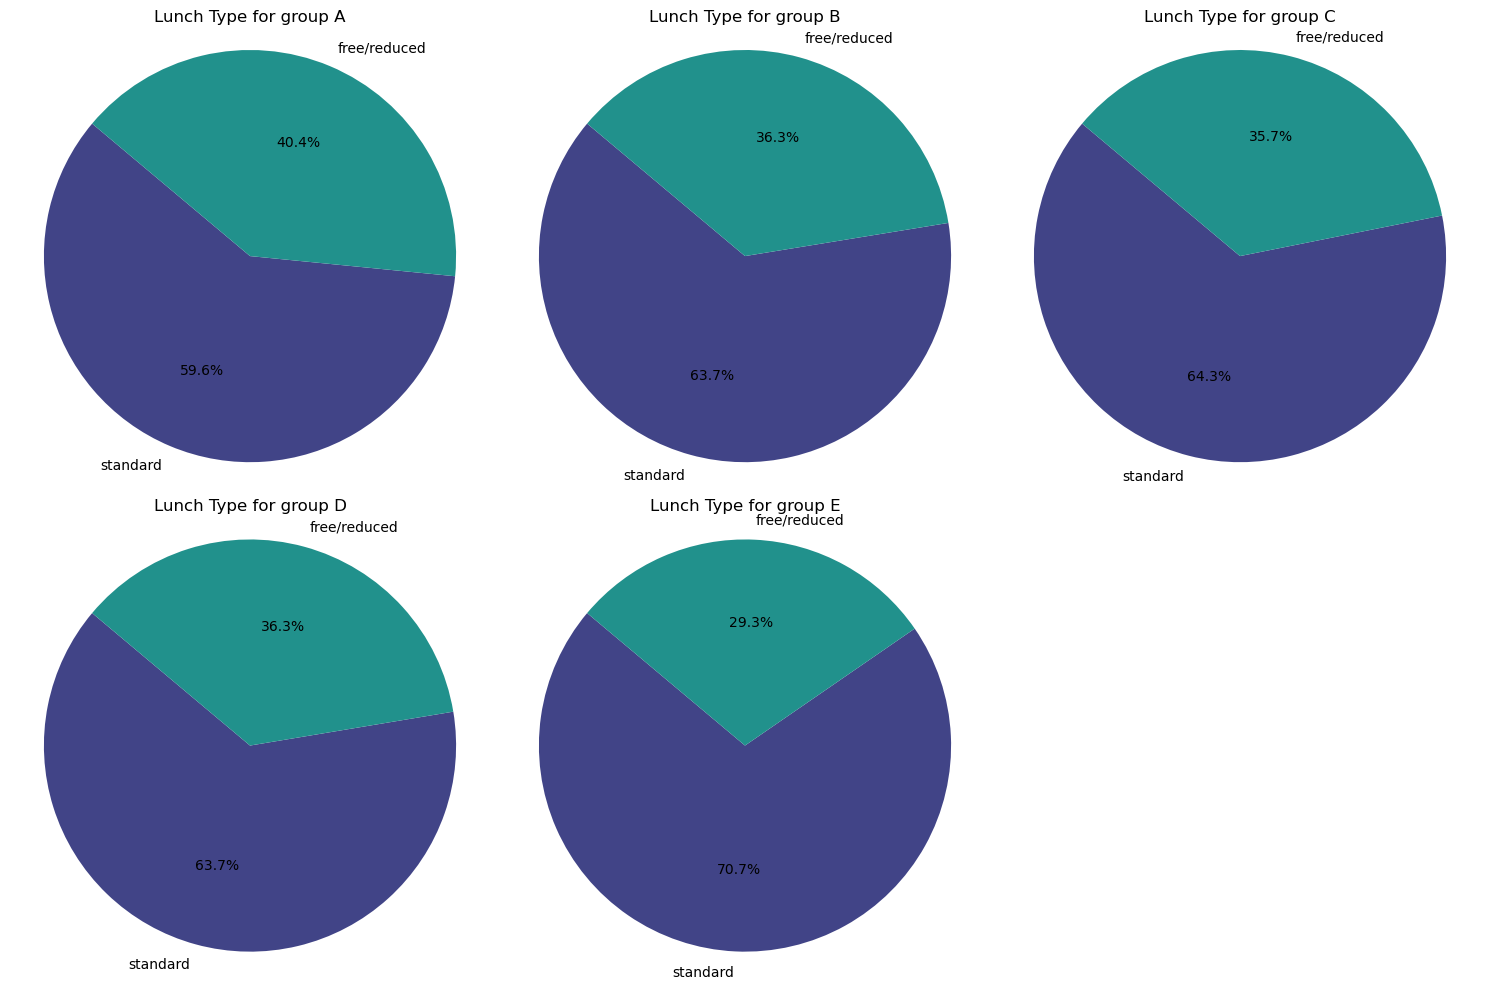

In [31]:
races = sorted(df['race/ethnicity'].unique())
viridis_colors = plt.cm.viridis([0.2, 0.5])  
n = len(races)
cols = 3
rows = (n + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  

for i, race in enumerate(races):
    race_df = df[df['race/ethnicity'] == race]
    
    lunch_distribution = race_df['lunch'].value_counts()
    
    axes[i].pie(lunch_distribution, 
                labels=lunch_distribution.index, 
                autopct='%1.1f%%', 
                colors=viridis_colors, 
                startangle=140)
    
    axes[i].set_title(f'Lunch Type for {race}')
    axes[i].axis('equal')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [32]:
races = sorted(df['race/ethnicity'].unique())

for race in races:
   
    race_df = df[df['race/ethnicity'] == race]
    
    lunch_distribution = race_df['lunch'].value_counts().reset_index()
    lunch_distribution.columns = ['lunch', 'count']
    
    fig = px.pie(lunch_distribution, 
                 names='lunch', 
                 values='count',
                 title=f'Distribution of Lunch Type for {race}',
                 color='lunch',
                 color_discrete_sequence=px.colors.sequential.Viridis)  # Use Viridis color sequence
    
    fig.update_layout(title_text=f'Distribution of Lunch Type for {race}')
    fig.show()

In [33]:
lunch_percentage = df.groupby('race/ethnicity')['lunch'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Pivot table to make the data easier to read
lunch_pivot = lunch_percentage.pivot_table(index='race/ethnicity', columns='lunch', values='percentage', fill_value=0)

print("Percentage distribution of lunch types by race/ethnicity:\n")
print(lunch_pivot)

Percentage distribution of lunch types by race/ethnicity:

lunch           free/reduced   standard
race/ethnicity                         
group A            40.449438  59.550562
group B            36.315789  63.684211
group C            35.736677  64.263323
group D            36.259542  63.740458
group E            29.285714  70.714286


In [34]:
gender_distribution = df.groupby(['race/ethnicity', 'gender']).size().reset_index(name='count')
total_counts = gender_distribution.groupby('race/ethnicity')['count'].transform('sum')
gender_distribution['percentage'] = (gender_distribution['count'] / total_counts) * 100

fig = px.bar(gender_distribution,
             x='race/ethnicity',
             y='percentage',
             color='gender',
             title='Gender Distribution by Race/Ethnicity',
             labels={'race/ethnicity': 'Race/Ethnicity', 'percentage': 'Percentage (%)'},
             color_discrete_map={'female': 'cornflowerblue', 'male': 'lightcoral'},  # Set colors
             text='percentage',
             barmode='group')  # Ensure bars are grouped

# Update layout
fig.update_layout(
    xaxis_title='Race/Ethnicity',
    yaxis_title='Percentage (%)',
    xaxis_tickangle=-45,
    title_x=0.5,
    yaxis=dict(range=[0, 100]),  # Extend y-axis to 100%
    legend_title='Gender'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

fig.show()

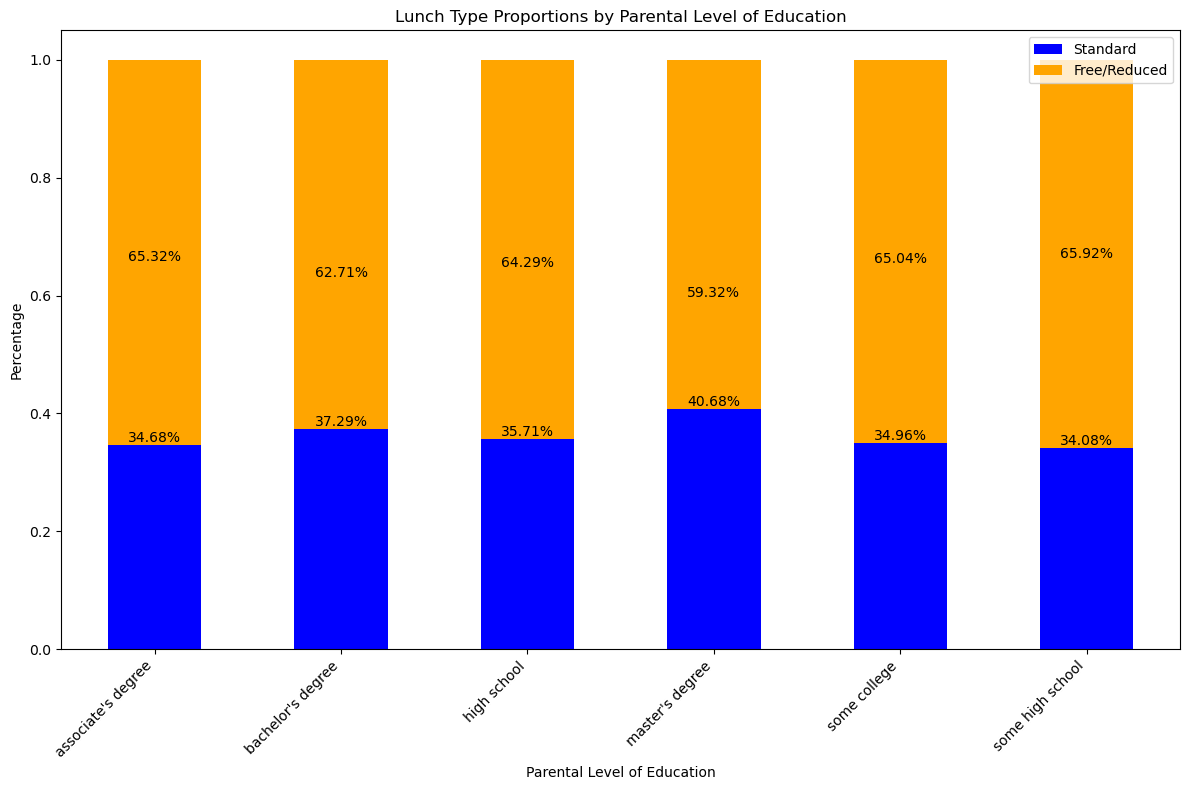

In [35]:
lunch_ratio = df.groupby('parental level of education')['lunch'].value_counts(normalize=True).unstack().fillna(0)
lunch_ratio.columns = ['Standard', 'Free/Reduced']
lunch_ratio = lunch_ratio.reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

lunch_ratio.set_index('parental level of education').plot(kind='bar', stacked=True, ax=ax, color=['blue', 'orange'])

ax.set_title('Lunch Type Proportions by Parental Level of Education')
ax.set_ylabel('Percentage')
ax.set_xlabel('Parental Level of Education')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

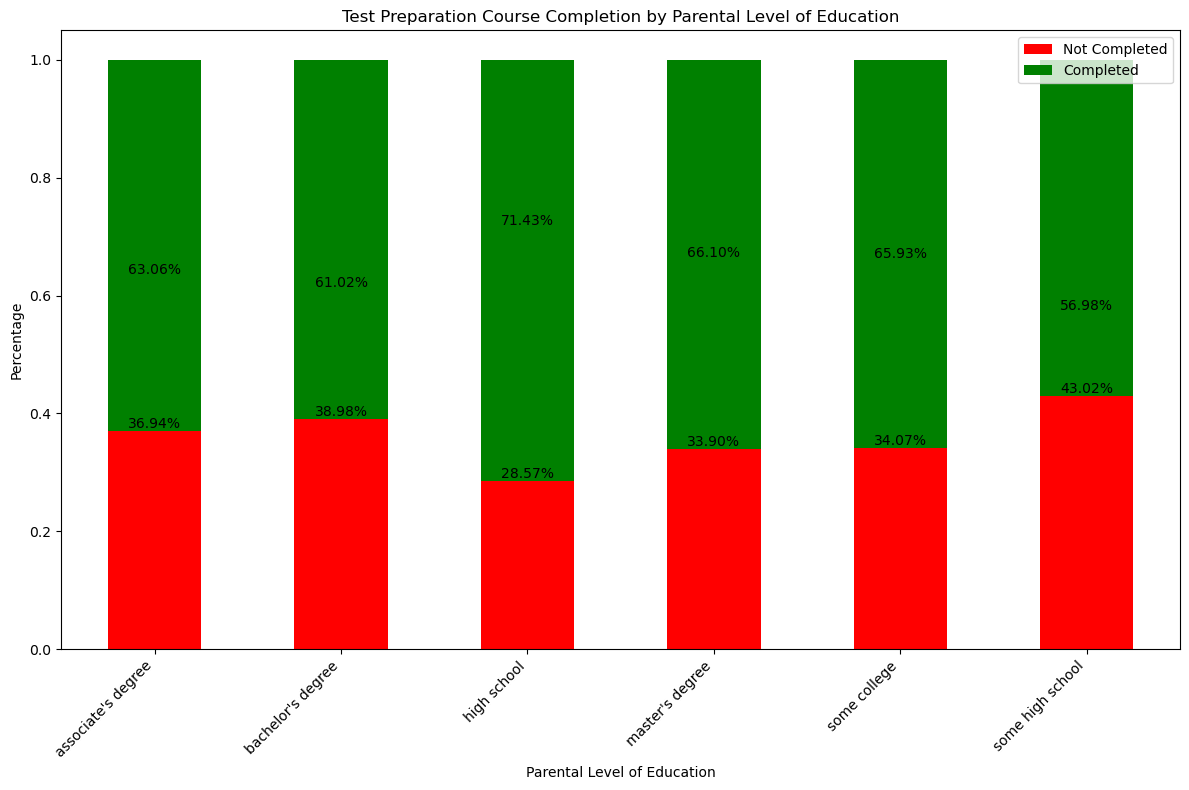

In [36]:
test_prep_ratio = df.groupby('parental level of education')['test preparation course'].value_counts(normalize=True).unstack().fillna(0)
test_prep_ratio.columns = ['Not Completed', 'Completed']
test_prep_ratio = test_prep_ratio.reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

test_prep_ratio.set_index('parental level of education').plot(kind='bar', stacked=True, ax=ax, color=['red', 'green'])

ax.set_title('Test Preparation Course Completion by Parental Level of Education')
ax.set_ylabel('Percentage')
ax.set_xlabel('Parental Level of Education')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

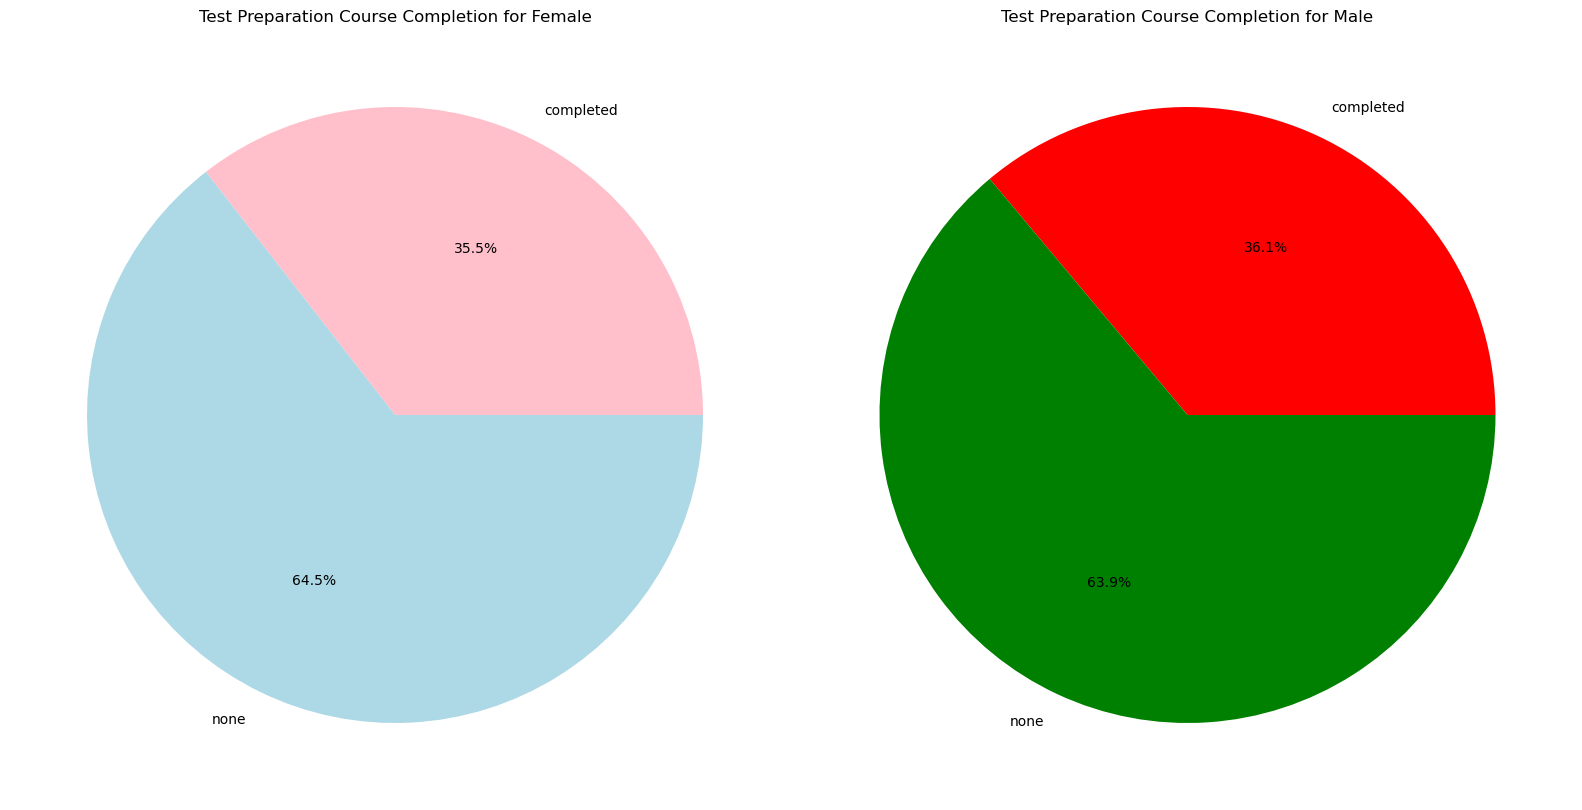

In [37]:
gender_test_prep = df.groupby('gender')['test preparation course'].value_counts(normalize=True).unstack().fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(gender_test_prep.loc['female'], labels=gender_test_prep.columns, autopct='%1.1f%%', colors=['pink', 'lightblue'])
axes[0].set_title('Test Preparation Course Completion for Female')

axes[1].pie(gender_test_prep.loc['male'], labels=gender_test_prep.columns, autopct='%1.1f%%', colors=['red', 'green'])
axes[1].set_title('Test Preparation Course Completion for Male')

plt.tight_layout()
plt.show()

In [38]:
# Convert categorical features to numerical values using Label Encoding
label_encoders = {}
for column in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df[['math score', 'reading score', 'writing score']]

importance_dict = {'math score': {}, 'reading score': {}, 'writing score': {}}

# Train the model and compute feature importances for each subject
for subject in y.columns:
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y[subject])
    importance = model.feature_importances_
    importance_dict[subject] = dict(zip(X.columns, importance))



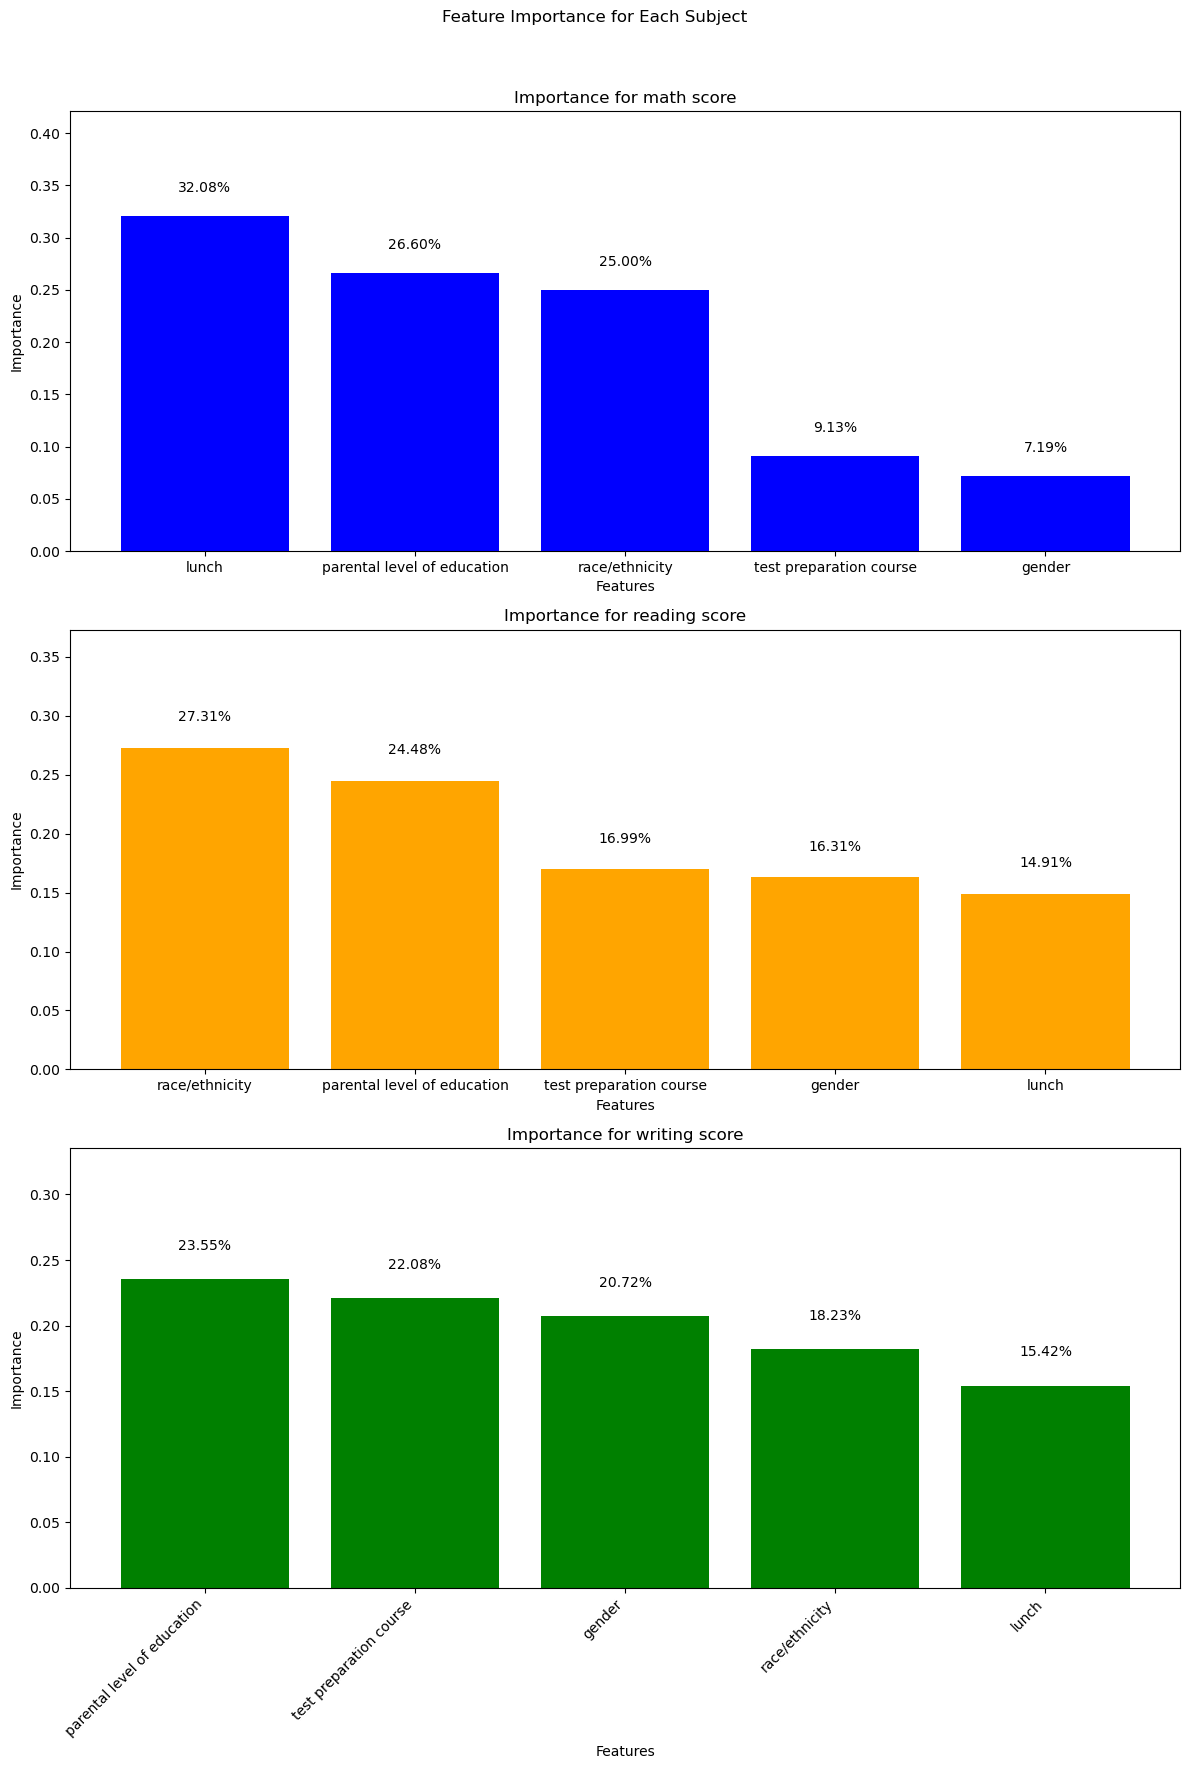

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)
fig.suptitle('Feature Importance for Each Subject')

colors = ['blue', 'orange', 'green']  

for idx, subject in enumerate(y.columns):
    sorted_importance = dict(sorted(importance_dict[subject].items(), key=lambda item: item[1], reverse=True))
    features = list(sorted_importance.keys())
    importances = list(sorted_importance.values())
    axes[idx].bar(features, importances, color=colors[idx])
    axes[idx].set_title(f'Importance for {subject}')
    axes[idx].set_ylabel('Importance')
    axes[idx].set_xlabel('Features')

    for i, value in enumerate(importances):
        axes[idx].text(i, value + 0.02, f'{value:.2%}', ha='center', va='bottom')

    axes[idx].set_ylim(0, max(importances) + 0.1)

axes[-1].set_xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()